In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read csv files
customer_data = pd.read_csv('musteri_verisi_5000_utf8.csv')
sales_data = pd.read_csv('satis_verisi_5000.csv')

TASK 1 - DATA CLEANING AND MANIPULATION

In [ ]:
#Analyze missing data for both table

print("Missing values in Customer Data:\n", customer_data.isnull().sum())
print("Missing values in Sales Data:\n", sales_data.isnull().sum())

In [ ]:
"""
According to the above results, there is no missing data in both tables. Therefore, no data filling process can be done.
"""

In [ ]:
#Outlier detection using IQR Based Filtering
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1                   
    lower_bound = Q1 - 1.5 * IQR    
    upper_bound = Q3 + 1.5 * IQR    

    #Find rows with outliers
    outliers = df[(df[column] <= lower_bound) | (df[column] >= upper_bound)]
    print(f"Outliers detected in '{column}': {len(outliers)}")
    print(f"Lower bound= {lower_bound}")
    print(f"Upper bound= {upper_bound}")
    return outliers, lower_bound, upper_bound

In [ ]:
price_outliers, price_lower, price_upper = detect_outliers(sales_data, 'fiyat')

sns.boxplot(data=sales_data, x='fiyat')
plt.show()

In [ ]:
piece_outliers, piece_lower, piece_upper = detect_outliers(sales_data, 'adet')

sns.boxplot(data=sales_data, x='adet')
plt.show()

In [ ]:
total_sales_outliers, total_sales_lower, total_sales_upper = detect_outliers(sales_data, 'toplam_satis')

sns.boxplot(data=sales_data, x='toplam_satis')
plt.show()

#There are 35 outliers for total sales

In [ ]:
spending_amount_outliers, spending_amount_lower, spending_amount_upper = detect_outliers(customer_data, 'harcama_miktari')

sns.boxplot(data=customer_data, x='harcama_miktari')
plt.show()

In [ ]:
age_outliers, age_lower, age_upper = detect_outliers(customer_data, 'yas')

sns.boxplot(data=customer_data, x='yas')
plt.show()

In [ ]:
def winsorize_outliers(df, column, lower_bound, upper_bound):
    df[column] = df[column].apply(
        lambda x: min(max(x, lower_bound), upper_bound)
    )
    return df

In [ ]:
sales_data = winsorize_outliers(sales_data,'toplam_satis', total_sales_lower, total_sales_upper)

sns.boxplot(data=sales_data, x='toplam_satis')
plt.show()


In [160]:
#Merge datasets
merged_data = pd.merge(sales_data, customer_data, on="musteri_id", how="inner")


In [ ]:
merged_data.head()

In [161]:
#Save merged dataset
merged_data.to_csv("merged_data.csv", index=False)

TASK 2: TIME SERIES ANALYSIS
Since there were no customer details in the analyses in this task, the sales_dataset was used instead of merged_data.

In [ ]:
#Convert date column to datatime format
sales_data["tarih"] = pd.to_datetime(sales_data["tarih"])

#Since time-based operations cannot be performed when the dates are not correct,
#conversion was made to the appropriate format.


#resample function is used for time series data


In [ ]:
#Start and end date value of sales data
start_date = sales_data["tarih"].min()
end_date = sales_data["tarih"].max()

print(f"Start date: {start_date}")
print(f"End date: {end_date}")

In [ ]:
#Find the dates of the first and last sales days of each month
monthly_first_last_days = sales_data.groupby(sales_data["tarih"].dt.to_period("M")).agg(
    first_day=("tarih", "min"),
    last_day=("tarih",  "max")
)

#Find the names of the first and last sales days of each month
monthly_first_last_days["first_day_name"] = monthly_first_last_days["first_day"].dt.day_name()
monthly_first_last_days["last_day_name"] = monthly_first_last_days["last_day"].dt.day_name()

print(f"First and Last Sales Days of each Month \n{monthly_first_last_days}")

In [ ]:
#Weekly product sales quantity analysis for date
weekly_product_sales_quantity = sales_data.resample("W", on="tarih")["adet"].sum() 
print(f"Weekly Product Sales Quantity \n{weekly_product_sales_quantity}")

In [ ]:
weekly_product_sales_quantity.plot(kind="line",title="Weekly Product Sales Quantity", figsize=(15, 5), marker="o")
plt.ylabel("Total Product Sales Quantity Numbers")
plt.xlabel("Date")
plt.grid()
plt.show()

In [ ]:
#Weekly total sales analysis for date
weekly_total_sales = sales_data.resample("W", on="tarih")["toplam_satis"].sum()     #resample function is used for time series data
print(f"Weekly Total Sales \n {weekly_total_sales}")

In [ ]:
weekly_total_sales.plot(kind="line", title="Weekly Total Sale",  marker="o", figsize=(15,5))   #(kind="line",title="Weekly Total Sales", figsize=(15, 5), marker="o")
plt.ylabel("Total Sales Numbers")
plt.xlabel("Date")
plt.show()

In [30]:
#Monthly product sales for date
monthly_product_sales_quantity = sales_data.resample("ME", on="tarih")["adet"].sum()  #Because of future warnings, used ME instead of M
print(f"Monthly Product Sales Quantity \n {monthly_product_sales_quantity}")

Monthly Product Sales Quantity 
 tarih
2022-11-30    1618
2022-12-31    2189
2023-01-31    2217
2023-02-28    2003
2023-03-31    2210
2023-04-30    2050
2023-05-31    2009
2023-06-30    1507
2023-07-31    2260
2023-08-31    1932
2023-09-30    2169
2023-10-31    2001
2023-11-30    2078
2023-12-31    2202
2024-01-31    2147
2024-02-29    2061
2024-03-31    2211
2024-04-30    2539
2024-05-31    2295
2024-06-30    1980
2024-07-31    2083
2024-08-31    2068
2024-09-30    1939
2024-10-31    2340
2024-11-30     251
Freq: ME, Name: adet, dtype: int64


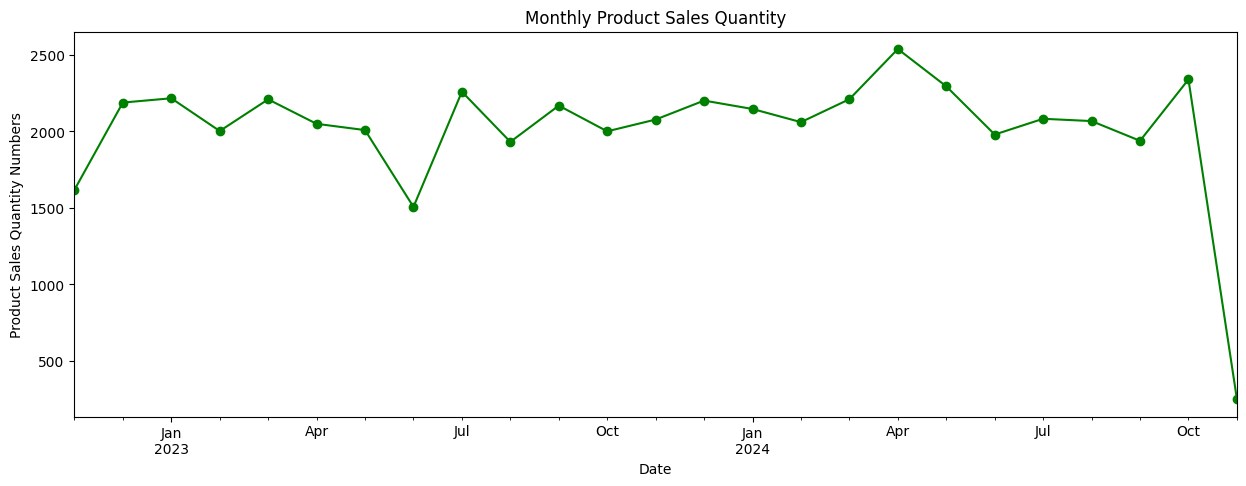

In [58]:
monthly_product_sales_quantity.plot(title="Monthly Product Sales Quantity", marker="o", color= "green", figsize=(15,5))
plt.xlabel("Date")
plt.ylabel("Product Sales Quantity Numbers")
plt.show()

In [49]:
#Monthly total sales for date
pd.options.display.float_format = '{:,.2f}'.format

monthly_total_sales = sales_data.resample("ME", on="tarih")["toplam_satis"].sum()  #Because of future warnings, used ME instead of M
print(f"Monthly Total Sales \n {monthly_total_sales}")

Monthly Total Sales 
 tarih
2022-11-30   1,121,684.07
2022-12-31   1,711,697.61
2023-01-31   1,422,855.49
2023-02-28   1,471,830.82
2023-03-31   1,831,540.54
2023-04-30   1,520,225.72
2023-05-31   1,482,531.98
2023-06-30   1,142,835.10
2023-07-31   1,646,041.80
2023-08-31   1,445,265.18
2023-09-30   1,614,787.51
2023-10-31   1,598,536.73
2023-11-30   1,543,398.48
2023-12-31   1,582,543.46
2024-01-31   1,535,476.09
2024-02-29   1,522,851.27
2024-03-31   1,721,787.07
2024-04-30   2,032,761.21
2024-05-31   1,716,399.30
2024-06-30   1,422,489.87
2024-07-31   1,512,406.09
2024-08-31   1,511,866.60
2024-09-30   1,443,222.11
2024-10-31   1,564,026.61
2024-11-30     211,246.16
Freq: ME, Name: toplam_satis, dtype: float64


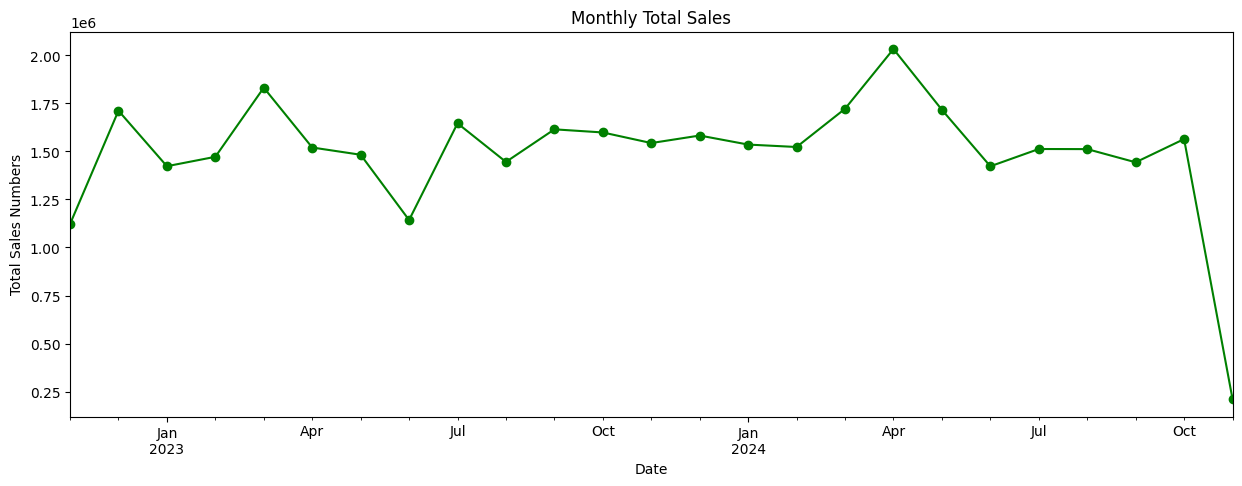

In [57]:
monthly_total_sales.plot(title="Monthly Total Sales", marker="o", color= "green", figsize=(15,5))
plt.xlabel("Date")
plt.ylabel("Total Sales Numbers")
plt.show()

In [ ]:
#The amount of increase or decrease compared to the previous month for product sales quantity
monthly_product_sales_quantity_diff = monthly_product_sales_quantity.diff()  
print(f"Monthly Product Sales Quantity Changes \n {monthly_product_sales_quantity_diff}")


#Since there is no previous data in the first month, the change rate appears as 0

In [ ]:
monthly_product_sales_quantity_diff.plot(kind="bar", figsize=(10, 5), title="Monthly Product Sales Quantity Changes")
plt.ylabel("Change Amount")
plt.xlabel("Date")
plt.grid()
plt.show()

In [ ]:
#The percentage change of increase or decrease compared to the previous month for product sales quantity
monthly_product_sales_quantity_percentage = monthly_product_sales_quantity.pct_change() * 100
print(f"Monthly Sales Unit Change Percentage \n {monthly_product_sales_quantity_percentage}")

#Since there is no previous data in the first month, the change rate appears as 0

In [ ]:
monthly_product_sales_quantity_percentage.plot(kind="line", title="% Monthly Sales Unit Change Percentage %", marker="o", figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Months")
plt.grid()
plt.show()

In [53]:
#The amount of increase or decrease compared to the previous month for total sales
monthly_total_sales_diff = monthly_total_sales.diff()  
print(f"Monthly Total Sale Changes \n {monthly_total_sales_diff}")

#Since there is no previous data in the first month, the change rate appears as 0

Monthly Total Sale Changes 
 tarih
2022-11-30             NaN
2022-12-31      590,013.54
2023-01-31     -288,842.12
2023-02-28       48,975.33
2023-03-31      359,709.72
2023-04-30     -311,314.82
2023-05-31      -37,693.74
2023-06-30     -339,696.88
2023-07-31      503,206.70
2023-08-31     -200,776.62
2023-09-30      169,522.33
2023-10-31      -16,250.78
2023-11-30      -55,138.25
2023-12-31       39,144.98
2024-01-31      -47,067.37
2024-02-29      -12,624.81
2024-03-31      198,935.80
2024-04-30      310,974.14
2024-05-31     -316,361.91
2024-06-30     -293,909.43
2024-07-31       89,916.22
2024-08-31         -539.48
2024-09-30      -68,644.49
2024-10-31      120,804.50
2024-11-30   -1,352,780.46
Freq: ME, Name: toplam_satis, dtype: float64


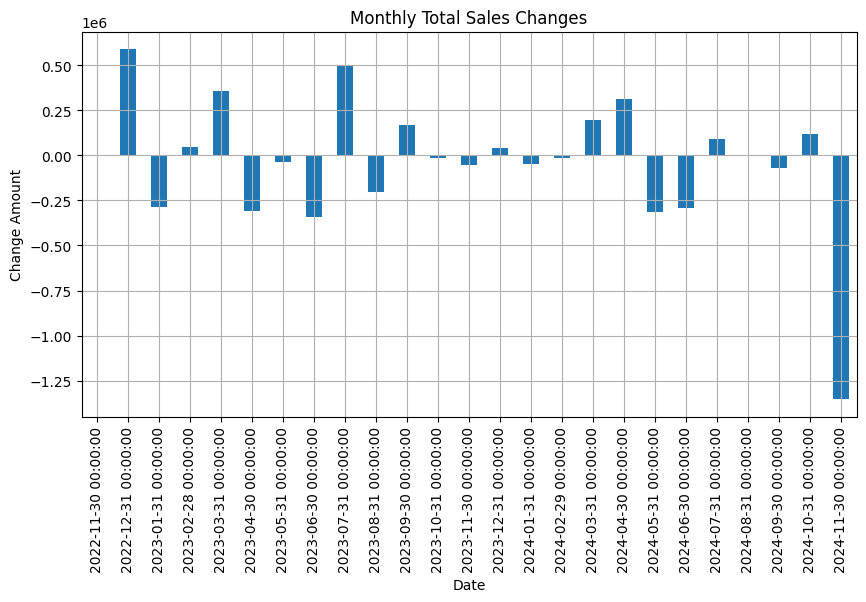

In [62]:
monthly_total_sales_diff.plot(kind="bar", figsize=(10, 5), title="Monthly Total Sales Changes")
plt.ylabel("Change Amount")
plt.xlabel("Date")
plt.grid()
plt.show()

In [63]:
#The percentage change of increase or decrease compared to the previous month for total sales
monthly_total_sales_percentage = monthly_total_sales.pct_change() * 100
print(f"Monthly Total Sales Changes Percentage \n {monthly_total_sales_percentage}")

Monthly Total Sales Changes Percentage 
 tarih
2022-11-30      NaN
2022-12-31    52.60
2023-01-31   -16.87
2023-02-28     3.44
2023-03-31    24.44
2023-04-30   -17.00
2023-05-31    -2.48
2023-06-30   -22.91
2023-07-31    44.03
2023-08-31   -12.20
2023-09-30    11.73
2023-10-31    -1.01
2023-11-30    -3.45
2023-12-31     2.54
2024-01-31    -2.97
2024-02-29    -0.82
2024-03-31    13.06
2024-04-30    18.06
2024-05-31   -15.56
2024-06-30   -17.12
2024-07-31     6.32
2024-08-31    -0.04
2024-09-30    -4.54
2024-10-31     8.37
2024-11-30   -86.49
Freq: ME, Name: toplam_satis, dtype: float64


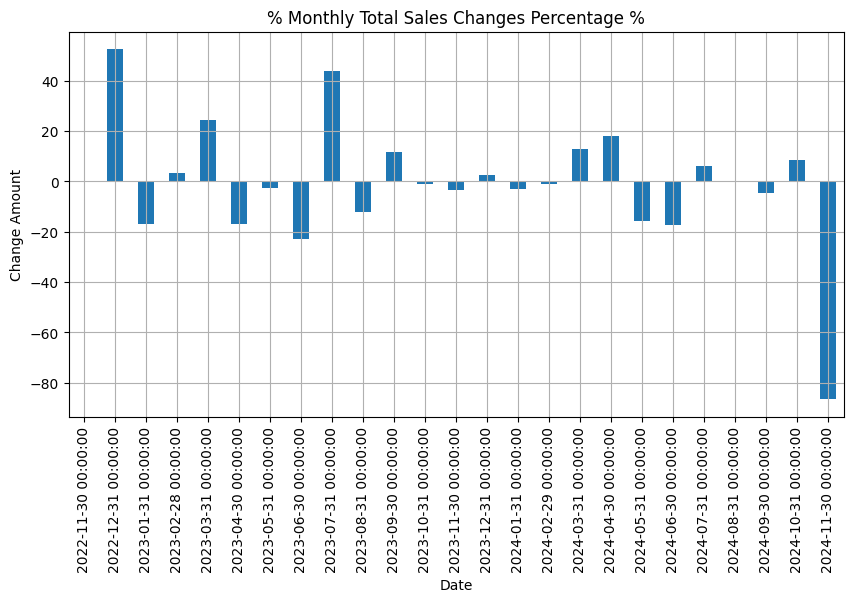

In [65]:
monthly_total_sales_percentage.plot(kind="bar", figsize=(10, 5), title="% Monthly Total Sales Changes Percentage %")
plt.ylabel("Change Amount")
plt.xlabel("Date")
plt.grid()
plt.show()

TASK 3 - Categorical and Numerical Analysis

In [ ]:
#Total sales with product category
product_category = sales_data.groupby("kategori")["toplam_satis"].sum()
product_category

kategori
Elektronik        6,143,433.74
Ev Aletleri       6,565,545.78
Giyim             6,272,433.46
Kozmetik          6,208,006.37
Kırtasiye         6,183,384.76
Mutfak Ürünleri   5,957,502.75
Name: toplam_satis, dtype: float64

In [71]:
product_category_percentage = (product_category / product_category.sum()) * 100
product_category_percentage

kategori
Elektronik        16.46
Ev Aletleri       17.59
Giyim             16.80
Kozmetik          16.63
Kırtasiye         16.56
Mutfak Ürünleri   15.96
Name: toplam_satis, dtype: float64

In [103]:
#Total sales by product category
product_category = sales_data.groupby("kategori")["toplam_satis"].sum()

#The percentace of each category in total sales
product_category_percentage = (product_category / product_category.sum()) * 100

#Display results in a single table
category_table = pd.DataFrame(
    {
    "Total sales by product category": product_category,
    "Percentage of each category": product_category_percentage
    }
)

print(category_table)

                 Total sales by product category  Percentage of each category
kategori                                                                     
Elektronik                          6,143,433.74                        16.46
Ev Aletleri                         6,565,545.78                        17.59
Giyim                               6,272,433.46                        16.80
Kozmetik                            6,208,006.37                        16.63
Kırtasiye                           6,183,384.76                        16.56
Mutfak Ürünleri                     5,957,502.75                        15.96


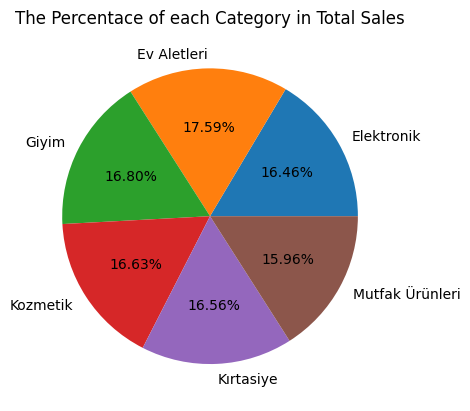

In [122]:
plt.pie(
    category_table["Percentage of each category"], 
    labels=category_table.index, 
    autopct="%1.2f%%"
)

plt.title("The Percentace of each Category in Total Sales")
plt.show()

In [162]:
#Sales trends of customers will be analyzed according to their age groups. 
#Therefore, merged_data was used instead of sales_data.


#First, the minimum and maximum age range limit in the dataset was checked.
min_age = merged_data["yas"].min()
print(f"Minimum age: {min_age}")

max_age = merged_data["yas"].max()
print(f"Maximum age: {max_age}")

Minimum age: 18
Maximum age: 69


In [163]:
bins = [18, 26, 36, 51, 150]    #age groups
labels = ["18-25", "26-35", "36-50", "50+"]

#Split customers by age groups
merged_data["yas"] = pd.cut(merged_data["yas"], bins=bins, labels=labels)

In [ ]:
#Total sales amount according to age groups
age_group_sales = merged_data.groupby("yas")["toplam_satis"].sum()
print(f"Total Sales According to Age Group: \n {age_group_sales}")


#According to these result, it was observed that the highest sales were over 50 years old.

Total Sales According to Age Group: 
 yas
18-25    5,797,811.97
26-35    6,912,078.64
36-50   11,219,861.78
50+     12,636,212.62
Name: toplam_satis, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_2860\1966912940.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = merged_data.groupby("yas")["toplam_satis"].sum()
